IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yara Khamis

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [6]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [7]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [8]:
np.unique(newsgroups_df['target'])

0        10
1         3
2        17
3         3
4         4
         ..
18841    13
18842    12
18843     3
18844     1
18845     7
Name: target, Length: 18846, dtype: int64

### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [3]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [4]:
import string

def nettoyage(chaine):
    chaine_mod = ""  # On crée une chaîne vide pour stocker le texte nettoyé

    # On parcourt chaque caractère de la chaîne
    for c in chaine:
        # Si le caractère est une ponctuation (mais PAS l'apostrophe), on le remplace par un espace
        if c in string.punctuation and c != "'":
            chaine_mod += " "
        else:
            # Sinon, on ajoute le caractère en minuscule à la chaîne finale
            chaine_mod += c.lower()

    return chaine_mod  # On retourne la chaîne nettoyée

def text2vect(chaine, mots_inutiles):
    chaine_nettoye = nettoyage(chaine)  # On nettoie la chaîne avec la fonction précédente

    mots = chaine_nettoye.split()  # On découpe la chaîne en mots (liste de tokens)

    # On filtre les mots : on garde seulement ceux qui NE SONT PAS dans la liste des mots inutiles
    mots_filtres = [mot for mot in mots if mot not in mots_inutiles]

    return mots_filtres  # On retourne la liste des mots utiles

In [5]:
#On transforme la colonne "stopword" du dataset en liste et on stocke le resultat dans stopwords_list
stopwords_list = stop_words_df['stopword'].tolist()

#Créer une liste vide pour stocker les tokens
lesmots_colonne = []

#Parcourir chaque ligne du DataFrame
for message in newsgroups_df['messages']:
    
    #Nettoyer et transformer le message en liste de mots utiles
    mots = text2vect(str(message), stopwords_list)
    
    #Ajouter la liste de mots (tokens) à la nouvelle colonne
    lesmots_colonne.append(mots)

#Ajouter cette nouvelle colonne au DataFrame
newsgroups_df['les_mots'] = lesmots_colonne

In [6]:
newsgroups_df

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, old, jasmine, drive, cannot, use, new, sys..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, dx2, 66, cpu, clone, motherboard, ..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, 3, space, 4, points, ..."


## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

#bag of words binaire
vect_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
textes = [' '.join(mots) for mots in newsgroups_df['les_mots']]
X_bin = vect_binaire.fit_transform(textes)
print(X_bin.shape)  # (nombre de documents, nombre de mots retenus)

(18846, 50000)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

#bag of words avec comptage
vect_count = CountVectorizer(max_features=50_000)  # version binaire + limite
textes = [' '.join(mots) for mots in newsgroups_df['les_mots']]
X_count = vect_count.fit_transform(textes)
print(X_count.shape)  # (nombre de documents, nombre de mots retenus)

(18846, 50000)


Iteration 0: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.9320113314447592
Iteration 1: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.8923512747875354
Iteration 2: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.9291784702549575
Iteration 3: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.9263456090651558
Iteration 4: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.9121813031161473

 Résultats de la validation croisée :
 - Fold 1: accuracy = 0.9320
 - Fold 2: accuracy = 0.8924
 - Fold 3: accuracy = 0.9292
 - Fold 4: accuracy = 0.9263
 - Fold 5: accuracy = 0.9122

 Moyenne des accuracies : 0.9184
 Écart-type : 0.0147


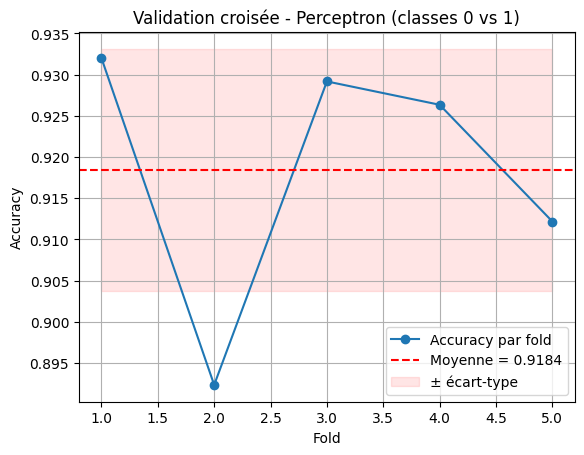

In [23]:
from sklearn.model_selection import train_test_split

#Perceptron avec bow_binaire et validation croisée

# -------------------------------
# Étape 1 : Sélection des classes 0 et 1 (binaire)
# -------------------------------
y = newsgroups_df['target'].values

mask = (y == 0) | (y == 1)
X_binaire = X_bin[mask]
y_binaire = y[mask]
y_binaire = np.where(y_binaire == 0, -1, 1)

# Conversion en array dense
X_binaire = X_binaire.toarray()

# -------------------------------
# Étape 2 : Création du classifieur Perceptron (non entraîné)
# -------------------------------
input_dim = X_binaire.shape[1]
perceptron = classif.ClassifierPerceptron(input_dimension=input_dim, learning_rate=0.01, init=True)

# -------------------------------
# Étape 3 : Validation croisée
# -------------------------------
nb_folds = 5
resultats, moyenne, ecart = ev.validation_croisee(perceptron, (X_binaire, y_binaire), nb_folds)

# -------------------------------
# Étape 4 : Résumé des résultats
# -------------------------------
print("\n Résultats de la validation croisée :")
for i, acc in enumerate(resultats):
    print(f" - Fold {i+1}: accuracy = {acc:.4f}")

print(f"\n Moyenne des accuracies : {moyenne:.4f}")
print(f" Écart-type : {ecart:.4f}")


#Visualisation
plt.plot(range(1, len(resultats)+1), resultats, marker='o', label='Accuracy par fold')
plt.axhline(y=moyenne, color='r', linestyle='--', label=f'Moyenne = {moyenne:.4f}')
plt.fill_between(range(1, len(resultats)+1),
                 moyenne - ecart,
                 moyenne + ecart,
                 color='red', alpha=0.1, label='± écart-type')
plt.title("Validation croisée - Perceptron (classes 0 vs 1)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Étape 1 : Filtrer classes 0 et 1
mask = (y == 0) | (y == 1)
X_knn = X_count[mask]
y_knn = y[mask]
y_knn = np.where(y_knn == 0, -1, 1)

# Étape 2 : Conversion en array dense (nécessaire pour ta classe KNN)
X_knn = X_knn.toarray()

# Étape 3 : Créer une instance de KNN (k=5 par exemple)
knn = classif.ClassifierKNN(input_dimension=X_knn.shape[1], k=5)

# Étape 4 : Validation croisée sur 5 folds
resultats_knn, moyenne_knn, ecart_knn = ev.validation_croisee(knn, (X_knn, y_knn), 5)

# Étape 5 : Affichage des résultats
print("\n Résultats de la validation croisée :")
for i, acc in enumerate(resultats_knn):
    print(f" - Fold {i+1}: accuracy = {acc:.4f}")

print(f"\n Moyenne des accuracies : {moyenne_knn:.4f}")
print(f" Écart-type : {ecart_knn:.4f}")


#Visualisation 
plt.plot(range(1, 6), resultats_knn, marker='o', label='Accuracy par fold')
plt.axhline(y=moyenne_knn, color='r', linestyle='--', label=f'Moyenne = {moyenne_knn:.4f}')
plt.fill_between(range(1, 6),
                 moyenne_knn - ecart_knn,
                 moyenne_knn + ecart_knn,
                 color='red', alpha=0.1, label='± écart-type')
plt.title("Validation croisée - KNN (classes 0 vs 1)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Iteration 0: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.6798866855524079
Iteration 1: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.6543909348441926
Iteration 2: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.6883852691218131


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
